In [83]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

In [6]:
def deFinetti(model,X,y):
    pred = model.predict_proba(X)
    if len(pred) == len(y):
        deF=0
        for i in range(len(pred)):
            if y.iloc[i] == 1:
                a,b,c=1,0,0
            elif y.iloc[i] == 0:
                a,b,c=0,1,0
            else:
                a,b,c=0,0,1
            deF += (pred[i][2]-a)**2+(pred[i][1]-b)**2+(pred[i][0]-c)**2
    return deF/len(pred)

In [7]:
df = pd.read_excel('Data/Matchs_processed.xlsx')
df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Div','Date'],axis=1,inplace=True)
df.Season = df.Season.apply(lambda x : int(x[:4]))
def transform_target(x):
    if x == 'H':
        return 1
    elif x == 'D':
        return 0
    elif x == 'A':
        return -1
df.FTR = df.FTR.apply(transform_target)

## Train/Test/Validate

*Saison 2010/2011 à 2018/2019 en train/test

*Saison 2019/2020 en validation pour le gambling

In [4]:
data = df[(df.Season <= 2018)]
validate = df[df.Season == 2019]
validate= validate.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
validate_reduc = validate.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA'],axis=1)
data = data.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
data_reduct = data.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA'],axis=1)
y_val=validate.FTR
X_val = validate.drop('FTR',axis=1)
y_val_r = validate_reduc.FTR
X_val_r = validate_reduc.drop('FTR',axis=1)
print(len(df),len(data),len(validate),len(data)+len(validate))

3659 3420 239 3659


## WITHOUT VAR SELECT


In [174]:
data = df[(df.Season <= 2018)]
validate = df[df.Season == 2019]
validate= validate.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
data = data.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
y_val=validate.FTR
X_val = validate.drop('FTR',axis=1)
print(len(df),len(data),len(validate),len(data)+len(validate))
from sklearn.model_selection import train_test_split
y=data.FTR
X=data.drop('FTR',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3659 3420 239 3659


## Lancement de modèle qui vont servir de baseline

In [42]:
clfs = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42),
        KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(random_state=42),XGBClassifier(seed=42)]
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test, y_test),)
    print('DeFinetti',deFinetti(clf,X_test,y_test))
    print('LogLoss',log_loss(y_test,clf.predict_proba(X_test)))
    print('Accuracy Score',accuracy_score(y_test, clf.predict(X_test)))


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<class 'sklearn.linear_model.logistic.LogisticRegression'>
score =  0.5555555555555556
DeFinetti 0.5567829552669132
LogLoss 0.9426477945118175
Accuracy Score 0.5555555555555556


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<class 'sklearn.ensemble.forest.RandomForestClassifier'>
score =  0.5292397660818714
DeFinetti 0.59672514619883
LogLoss 1.8722382298290485
Accuracy Score 0.5292397660818714
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
score =  0.46345029239766083
DeFinetti 0.6667836257309948
LogLoss 4.599853804911176
Accuracy Score 0.46345029239766083
<class 'sklearn.naive_bayes.GaussianNB'>
score =  0.5467836257309941
DeFinetti 0.7556719404704332
LogLoss 2.7397804768079554
Accuracy Score 0.5467836257309941
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
score =  0.4517543859649123
DeFinetti 1.0964912280701755
LogLoss 18.935732672648403
Accuracy Score 0.4517543859649123
<class 'xgboost.sklearn.XGBClassifier'>
score =  0.5906432748538012
DeFinetti 0.5166096364066267
LogLoss 0.875414233349743
Accuracy Score 0.5906432748538012


In [6]:
svclassifier = SVC(probability=True)
svclassifier.fit(X_train, y_train)

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
print('DeFinetti',deFinetti(svclassifier,X_test,y_test))
print('LogLoss',log_loss(y_test,svclassifier.predict_proba(X_test)))
print('Accuracy Score',accuracy_score(y_test, svclassifier.predict(X_test)))

DeFinetti 0.6352237654591243
LogLoss 1.055813949161366
Accuracy Score 0.47514619883040937


Text(0.5, 1, 'SVM : Matrice de confusion')

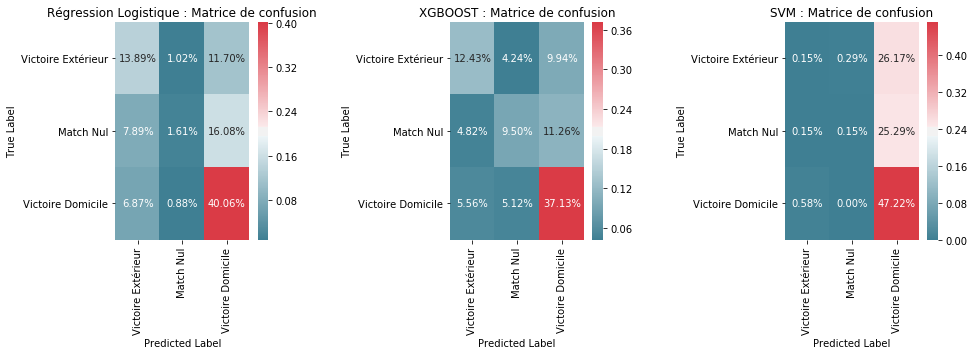

In [50]:
plt.figure(figsize=(15,4))
plt.subplot(131)
matrix = confusion_matrix(y_test, clfs[0].predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Régression Logistique : Matrice de confusion')
plt.subplot(132)
matrix = confusion_matrix(y_test, clfs[5].predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('XGBOOST : Matrice de confusion')
plt.subplot(133)
matrix = confusion_matrix(y_test, svclassifier.predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.subplots_adjust(wspace=1)
plt.title('SVM : Matrice de confusion')

### Tentatives d'optimisation des quatre modèles sélectionnés

In [70]:
grid =[
    {'penalty':['elasticnet'],'C':[i for i in range(1,11)],'solver':['saga']},
    {'penalty':['l2'],'C':[i for i in range(1,11)],'solver':['newton-cg','sag','lbfgs','liblinear']},
    {'penalty':['l1'],'C':[i for i in range(1,11)],'solver':['saga','liblinear']}
]
GCV=GridSearchCV(LogisticRegression(random_state=42,l1_ratio=1), param_grid = grid, cv = 5, verbose=True, n_jobs=-1)
GCV.fit(X_train,y_train)

In [72]:
print("tuned hpyerparameters :(best parameters) ",GCV.best_params_)
print("accuracy :",GCV.best_score_)
print('DeFinetti:',deFinetti(GCV,X_test,y_test))
print('LogLoss : ',log_loss(y_test,GCV.predict_proba(X_test)))

tuned hpyerparameters :(best parameters)  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.5486111111111112
DeFinetti: 0.530966385096473
LogLoss :  0.8980437737591483


In [164]:
print("accuracy :",GCV.best_score_)
print('DeFinetti:',deFinetti(GCV,X_val,y_val))
print('LogLoss : ',log_loss(y_val,GCV.predict_proba(X_val)))

accuracy : 0.5482456140350878
DeFinetti: 0.6014906882908346
LogLoss :  1.0727162154588936


In [76]:
grid2 =[
    {'kernel':['rbf','sigmoid'],'C':[i for i in range(1,11)],'gamma':['scale'],'decision_function_shape':['ovo']},
    {'kernel':['poly'],'C':[i for i in range(1,11)],'degree':[i for i in range(1,4)],'gamma':['scale'],'decision_function_shape':['ovo']}
]

In [78]:
GCV2=GridSearchCV(SVC(random_state=42,probability=True), param_grid = grid2, cv = 5, verbose=True, n_jobs=-1)
GCV2.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 14.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'decision_function_shape': ['ovo'],
                          'gamma': ['scale'], 'kernel': ['rbf', 'sigmoid']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'decision_function_shape': ['ovo'],
                          'degree': [1, 2, 3], 'gamma': ['scale'],
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbos

In [79]:
print("tuned hpyerparameters :(best parameters) ",GCV2.best_params_)
print("accuracy :",GCV2.best_score_)
print('DeFinetti:',deFinetti(GCV2,X_test,y_test))
print('LogLoss : ',log_loss(y_test,GCV2.predict_proba(X_test)))

tuned hpyerparameters :(best parameters)  {'C': 8, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
accuracy : 0.5277777777777778
DeFinetti: 0.5796965565071636
LogLoss :  0.9758771540698868


In [22]:
grid3 ={'eta':[i for i in np.arange(0.01,0.21,0.01)],
            'max_depth':[i for i in range(11)],
            'colsample_bytree':[i for i in np.arange(0.5,1.0,0.1)]}
estimator = XGBClassifier(objective='multi:softmax',eval_metric='logloss',seed=42)

In [23]:
grid3 ={'eta':[i for i in np.arange(0.01,0.21,0.01)],
            'max_depth':[i for i in range(11)],
            'colsample_bytree':[i for i in np.arange(0.5,1.0,0.1)]}
estimator = XGBClassifier(objective='multi:softmax',eval_metric='logloss',seed=42)
GCV3=GridSearchCV(estimator = estimator, param_grid = grid3, cv = 5, verbose=True, n_jobs=3)
GCV3.fit(X_train,y_train)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   36.8s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  2.4min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  5.5min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  9.4min
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed: 14.8min
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed: 22.0min
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed: 31.4min
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed: 46.5min
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed: 62.3min
[Parallel(n_jobs=3)]: Done 4994 tasks      | elapsed: 82.7min
[Parallel(n_jobs=3)]: Done 5500 out of 5500 | elapsed: 94.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='logloss',
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='multi:softmax', random_state...
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7, 0.7999999999999999,
                                              0.8999999999999999],
                         'eta': [0.01, 0.02, 0.03, 0.04, 0.05,
                                 0.060000000000000005, 0.06999999999999999,
                                 0.08, 0.09, 0.09999999999999999, 0.1

In [24]:
print("tuned hpyerparameters :(best parameters) ",GCV3.best_params_)
print("accuracy :",GCV3.best_score_)
print('DeFinetti:',deFinetti(GCV3,X_test,y_test))
print('LogLoss : ',log_loss(y_test,GCV3.predict_proba(X_test)))

tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.7999999999999999, 'eta': 0.01, 'max_depth': 2}
accuracy : 0.5738304093567251
DeFinetti: 0.5176544987440975
LogLoss :  0.8749258246882792


NameError: name 'GCV' is not defined

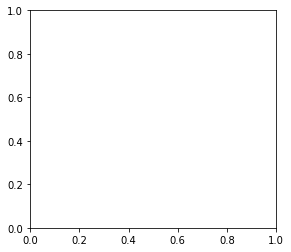

In [27]:
plt.figure(figsize=(15,4))
plt.subplot(131)
matrix = confusion_matrix(y_test, GCV.predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Régression Logistique : Matrice de confusion')
plt.subplot(132)
matrix = confusion_matrix(y_test, GCV2.predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('XGBOOST : Matrice de confusion')
plt.subplot(133)
matrix = confusion_matrix(y_test, GCV3.predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.subplots_adjust(wspace=1)
plt.title('SVM : Matrice de confusion')

In [175]:
grid4 ={'n_estimators':[100,250,500,750,1000],
       'criterion':['gini','entropy'],
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf' :[1, 2, 4],
       'bootstrap':[True,False]}
estimator = RandomForestClassifier(random_state=42)
GCV4=GridSearchCV(estimator = estimator, param_grid = grid4, cv = 5, verbose=True, n_jobs=3)
GCV4.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  7.8min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 25.2min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 54.6min
[Parallel(n_jobs=3)]: Done 900 out of 900 | elapsed: 71.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'boo

In [176]:
print("tuned hpyerparameters :(best parameters) ",GCV4.best_params_)
print("accuracy :",GCV4.best_score_)
print('DeFinetti:',deFinetti(GCV4,X_test,y_test))
print('LogLoss : ',log_loss(y_test,GCV4.predict_proba(X_test)))

tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
accuracy : 0.5617690058479532
DeFinetti: 0.5274978947918563
LogLoss :  0.8921876370718714


Text(0.5, 1, 'RF : Matrice de confusion')

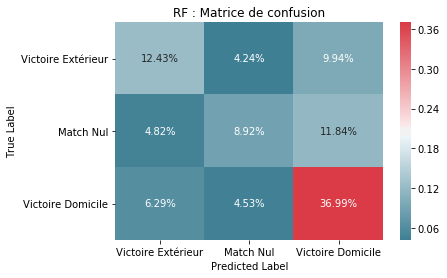

In [177]:
matrix = confusion_matrix(y_test, GCV4.predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.subplots_adjust(wspace=1)
plt.title('RF : Matrice de confusion')

## Sélection de variable
On sélectionne les variables en regardant les différentes corrélations associées et l'importance des variables à notre cible FTR

In [29]:
sub_df = df.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)

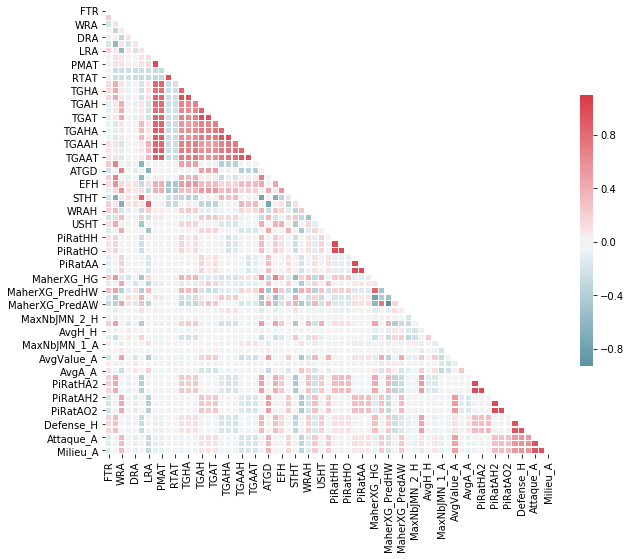

In [178]:
corr=sub_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
var_corr = sub_df.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA','PMAT'],axis=1)

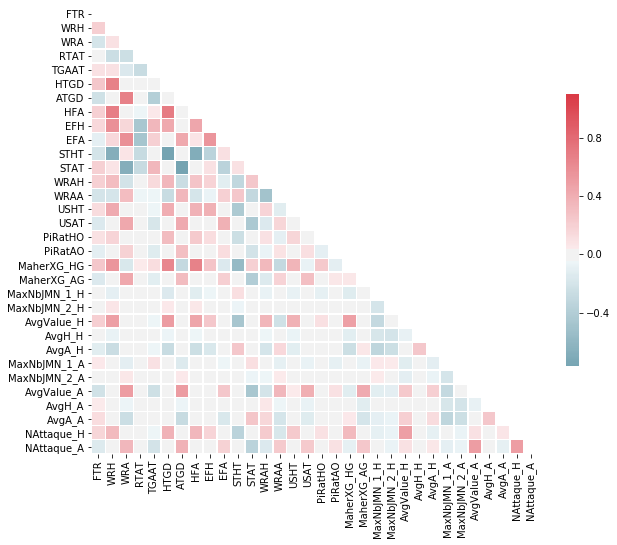

In [40]:
corr=var_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Test de normalisation de l'attaque

In [37]:
sc= StandardScaler()
var_corr['NAttaque_H']=sc.fit_transform(np.array(var_corr.Attaque_H).reshape(-1, 1))
var_corr['NAttaque_A']=sc.fit_transform(np.array(var_corr.Attaque_A).reshape(-1, 1))

In [39]:
var_corr=var_corr.drop(['Attaque_H','Attaque_A'],axis=1)

## Feature importance

Différentes méthodes de features importances sont utilisés pour tenter d'obtenir les variables les plus importantes. A la fin, les variables qui apparaissent au moins une fois dans les 4 méthodes seront prises en compte

In [97]:
data = df[(df.Season <= 2018)]
validate = df[df.Season == 2019]
validate= validate.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
validate = validate.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA','PMAT','Attaque_H','Attaque_A'],axis=1)
data = data.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
data=data.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA','PMAT','Attaque_H','Attaque_A'],axis=1)
y_val=validate.FTR
X_val = validate.drop('FTR',axis=1)
print(len(df),len(data),len(validate),len(data)+len(validate))
from sklearn.model_selection import train_test_split
y=data.FTR
X=data.drop('FTR',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train.columns)

3659 3420 239 3659


29

In [98]:
rfe_selector = RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=10, step=1, verbose=5)
rfe_selector.fit(X_train, y_train)

Fitting estimator with 29 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 28 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 27 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 26 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 25 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 24 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 23 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 22 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 21 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 20 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 19 features.
Fitting estimator with 18 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 17 features.
Fitting estimator with 16 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 15 features.
Fitting estimator with 14 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 13 features.
Fitting estimator with 12 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 11 features.


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=42, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=5)

In [99]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

10 selected features


In [100]:
rfe_feature

['WRH',
 'WRA',
 'WRAH',
 'WRAA',
 'PiRatHO',
 'PiRatAO',
 'MaherXG_HG',
 'MaherXG_AG',
 'AvgValue_H',
 'AvgValue_A']

In [101]:
X_train,X_test,X_val = X_train[rfe_feature],X_test[rfe_feature],X_val[rfe_feature]
clfs = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42),
        KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(random_state=42),XGBClassifier(seed=42)]
for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test, y_test),)
    print('DeFinetti',deFinetti(clf,X_test,y_test))
    print('LogLoss',log_loss(y_test,clf.predict_proba(X_test)))
    print('Accuracy Score',accuracy_score(y_test, clf.predict(X_test)))

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<class 'sklearn.linear_model.logistic.LogisticRegression'>
score =  0.5453216374269005
DeFinetti 0.5611848128823911
LogLoss 0.9479516153322431
Accuracy Score 0.5453216374269005
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
score =  0.5614035087719298
DeFinetti 0.5683625730994144
LogLoss 1.7747541356125518
Accuracy Score 0.5614035087719298
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
score =  0.47953216374269003
DeFinetti 0.6654970760233919
LogLoss 4.873654244610319
Accuracy Score 0.47953216374269003
<class 'sklearn.naive_bayes.GaussianNB'>
score =  0.5497076023391813
DeFinetti 0.5843741815218655
LogLoss 1.0685329771546448
Accuracy Score 0.5497076023391813
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
score =  0.4692982456140351
DeFinetti 1.0614035087719298
LogLoss 18.32978922712365
Accuracy Score 0.4692982456140351
<class 'xgboost.sklearn.XGBClassifier'>
score =  0.5994152046783626
DeFinetti 0.5223492872135561
LogLoss 0.8853682622705635
Accuracy Score

In [102]:
data = df[(df.Season <= 2018)]
validate = df[df.Season == 2019]
validate= validate.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
validate = validate.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA','PMAT','Attaque_H','Attaque_A'],axis=1)
data = data.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
data=data.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA','PMAT','Attaque_H','Attaque_A'],axis=1)
y_val=validate.FTR
X_val = validate.drop('FTR',axis=1)
print(len(df),len(data),len(validate),len(data)+len(validate))
from sklearn.model_selection import train_test_split
y=data.FTR
X=data.drop('FTR',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train.columns)

3659 3420 239 3659


29

In [103]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [104]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)),embeded_rf_feature, 'selected features')

5 ['PiRatHO', 'PiRatAO', 'MaherXG_HG', 'AvgValue_H', 'AvgValue_A'] selected features


In [105]:
X_train,X_test,X_val = X_train[embeded_rf_feature],X_test[embeded_rf_feature],X_val[embeded_rf_feature]
clfs = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42),
        KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(random_state=42),XGBClassifier(seed=42)]
for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test, y_test),)
    print('DeFinetti',deFinetti(clf,X_test,y_test))
    print('LogLoss',log_loss(y_test,clf.predict_proba(X_test)))
    print('Accuracy Score',accuracy_score(y_test, clf.predict(X_test)))

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<class 'sklearn.linear_model.logistic.LogisticRegression'>
score =  0.5467836257309941
DeFinetti 0.5614048484661566
LogLoss 0.948921417551143
Accuracy Score 0.5467836257309941
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
score =  0.5467836257309941
DeFinetti 0.5931286549707596
LogLoss 2.554520722056742
Accuracy Score 0.5467836257309941
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
score =  0.45321637426900585
DeFinetti 0.6876023391812862
LogLoss 5.096439258252408
Accuracy Score 0.45321637426900585
<class 'sklearn.naive_bayes.GaussianNB'>
score =  0.5628654970760234
DeFinetti 0.5419413091711198
LogLoss 0.9469570652228848
Accuracy Score 0.5628654970760234
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
score =  0.4444444444444444
DeFinetti 1.1111111111111112
LogLoss 19.18820910828371
Accuracy Score 0.4444444444444444
<class 'xgboost.sklearn.XGBClassifier'>
score =  0.6023391812865497
DeFinetti 0.5262066855963964
LogLoss 0.8904415433518371
Accuracy Score 0

In [109]:
data = df[(df.Season <= 2018)]
validate = df[df.Season == 2019]
validate= validate.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
validate = validate.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA','PMAT','Attaque_H','Attaque_A'],axis=1)
data = data.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
data=data.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA','PMAT','Attaque_H','Attaque_A'],axis=1)
y_val=validate.FTR
X_val = validate.drop('FTR',axis=1)
print(len(df),len(data),len(validate),len(data)+len(validate))
from sklearn.model_selection import train_test_split
y=data.FTR
X=data.drop('FTR',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train.columns)

3659 3420 239 3659


29

In [110]:
embeded_LR_selector = SelectFromModel(LogisticRegression(random_state=42,C= 10,penalty='l1',solver= 'liblinear'), threshold='1.25*median')
embeded_LR_selector.fit(X_train, y_train)

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SelectFromModel(estimator=LogisticRegression(C=10, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=42,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False,
                threshold='1.25*median')

In [111]:
embeded_LR_support = embeded_LR_selector.get_support()
embeded_LR_feature = X.loc[:,embeded_LR_support].columns.tolist()
print(str(len(embeded_LR_feature)),embeded_LR_feature, 'selected features')

12 ['WRH', 'WRA', 'WRAH', 'WRAA', 'PiRatHO', 'PiRatAO', 'MaherXG_HG', 'MaherXG_AG', 'AvgValue_H', 'AvgA_H', 'AvgValue_A', 'AvgA_A'] selected features


In [112]:
X_train,X_test,X_val = X_train[embeded_LR_feature],X_test[embeded_LR_feature],X_val[embeded_LR_feature]
clfs = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42),
        KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(random_state=42),XGBClassifier(seed=42)]
for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test, y_test),)
    print('DeFinetti',deFinetti(clf,X_test,y_test))
    print('LogLoss',log_loss(y_test,clf.predict_proba(X_test)))
    print('Accuracy Score',accuracy_score(y_test, clf.predict(X_test)))

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<class 'sklearn.linear_model.logistic.LogisticRegression'>
score =  0.554093567251462
DeFinetti 0.5605652084569243
LogLoss 0.9467998864425152
Accuracy Score 0.554093567251462
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
score =  0.5277777777777778
DeFinetti 0.5967251461988298
LogLoss 1.9583514757406446
Accuracy Score 0.5277777777777778
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
score =  0.4824561403508772
DeFinetti 0.6705263157894742
LogLoss 5.544633091385574
Accuracy Score 0.4824561403508772
<class 'sklearn.naive_bayes.GaussianNB'>
score =  0.5570175438596491
DeFinetti 0.592191275443462
LogLoss 1.0936007451439764
Accuracy Score 0.5570175438596491
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
score =  0.489766081871345
DeFinetti 1.0204678362573099
LogLoss 17.622855207344777
Accuracy Score 0.489766081871345
<class 'xgboost.sklearn.XGBClassifier'>
score =  0.6008771929824561
DeFinetti 0.5234713204053529
LogLoss 0.8876367785439593
Accuracy Score 0.600

In [113]:
data = df[(df.Season <= 2018)]
validate = df[df.Season == 2019]
validate= validate.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
validate = validate.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA','PMAT','Attaque_H','Attaque_A'],axis=1)
data = data.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
data=data.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA','PMAT','Attaque_H','Attaque_A'],axis=1)
y_val=validate.FTR
X_val = validate.drop('FTR',axis=1)
print(len(df),len(data),len(validate),len(data)+len(validate))
from sklearn.model_selection import train_test_split
y=data.FTR
X=data.drop('FTR',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train.columns)

3659 3420 239 3659


29

In [114]:
embeded_xgb_selector = SelectFromModel(XGBClassifier(seed=42), threshold='1.25*median')
embeded_xgb_selector.fit(X_train, y_train)

SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                        colsample_bylevel=1, colsample_bynode=1,
                                        colsample_bytree=1, gamma=0,
                                        learning_rate=0.1, max_delta_step=0,
                                        max_depth=3, min_child_weight=1,
                                        missing=None, n_estimators=100,
                                        n_jobs=1, nthread=None,
                                        objective='binary:logistic',
                                        random_state=0, reg_alpha=0,
                                        reg_lambda=1, scale_pos_weight=1,
                                        seed=42, silent=None, subsample=1,
                                        verbosity=1),
                max_features=None, norm_order=1, prefit=False,
                threshold='1.25*median')

In [115]:
embeded_xgb_support = embeded_xgb_selector.get_support()
embeded_xgb_feature = X.loc[:,embeded_xgb_support].columns.tolist()
print(str(len(embeded_xgb_feature)),embeded_xgb_feature, 'selected features')

8 ['WRH', 'HTGD', 'EFA', 'STAT', 'PiRatHO', 'PiRatAO', 'AvgValue_H', 'AvgValue_A'] selected features


In [116]:
X_train,X_test,X_val = X_train[embeded_xgb_feature],X_test[embeded_xgb_feature],X_val[embeded_xgb_feature]
clfs = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42),
        KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(random_state=42),XGBClassifier(seed=42)]
for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test, y_test),)
    print('DeFinetti',deFinetti(clf,X_test,y_test))
    print('LogLoss',log_loss(y_test,clf.predict_proba(X_test)))
    print('Accuracy Score',accuracy_score(y_test, clf.predict(X_test)))

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<class 'sklearn.linear_model.logistic.LogisticRegression'>
score =  0.5482456140350878
DeFinetti 0.5616801658773686
LogLoss 0.9487657309686011
Accuracy Score 0.5482456140350878
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
score =  0.5599415204678363
DeFinetti 0.5816666666666659
LogLoss 2.0783563036063954
Accuracy Score 0.5599415204678363
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
score =  0.4692982456140351
DeFinetti 0.6636257309941526
LogLoss 4.644028959496029
Accuracy Score 0.4692982456140351
<class 'sklearn.naive_bayes.GaussianNB'>
score =  0.5657894736842105
DeFinetti 0.5629227139928248
LogLoss 0.9882604789515653
Accuracy Score 0.5657894736842105
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
score =  0.4692982456140351
DeFinetti 1.0614035087719298
LogLoss 18.32978922712365
Accuracy Score 0.4692982456140351
<class 'xgboost.sklearn.XGBClassifier'>
score =  0.6125730994152047
DeFinetti 0.5170444546516603
LogLoss 0.8736242039880732
Accuracy Score 0

In [121]:
data = df[(df.Season <= 2018)]
validate = df[df.Season == 2019]
validate= validate.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
validate = validate.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA','PMAT','Attaque_H','Attaque_A'],axis=1)
data = data.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
data=data.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA','PMAT','Attaque_H','Attaque_A'],axis=1)
y_val=validate.FTR
X_val = validate.drop('FTR',axis=1)
print(len(df),len(data),len(validate),len(data)+len(validate))
from sklearn.model_selection import train_test_split
y=data.FTR
X=data.drop('FTR',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
f_names=X.columns
len(X_train.columns)

3659 3420 239 3659


29

In [118]:
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40,random_state=42)
embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X_train, y_train)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                         class_weight=None,
                                         colsample_bytree=0.2,
                                         importance_type='split',
                                         learning_rate=0.05, max_depth=-1,
                                         min_child_samples=20,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         n_jobs=-1, num_leaves=32,
                                         objective=None, random_state=42,
                                         reg_alpha=3, reg_lambda=1, silent=True,
                                         subsample=1.0,
                                         subsample_for_bin=200000,
                                         subsample_freq=0),
                max_features=None, norm_order=1, prefit=False,


In [119]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)),embeded_lgb_feature,'selected features')

7 ['TGAAT', 'PiRatHO', 'PiRatAO', 'MaherXG_HG', 'MaherXG_AG', 'AvgValue_H', 'AvgA_H'] selected features


In [120]:
X_train,X_test,X_val = X_train[embeded_lgb_feature],X_test[embeded_lgb_feature],X_val[embeded_lgb_feature]
clfs = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42),
        KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(random_state=42),XGBClassifier(seed=42)]
for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test, y_test),)
    print('DeFinetti',deFinetti(clf,X_test,y_test))
    print('LogLoss',log_loss(y_test,clf.predict_proba(X_test)))
    print('Accuracy Score',accuracy_score(y_test, clf.predict(X_test)))

<class 'sklearn.linear_model.logistic.LogisticRegression'>
score =  0.5102339181286549
DeFinetti 0.5843769981638312
LogLoss 0.9813175191055249
Accuracy Score 0.5102339181286549


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<class 'sklearn.ensemble.forest.RandomForestClassifier'>
score =  0.4853801169590643
DeFinetti 0.6142105263157889
LogLoss 2.256938178818614
Accuracy Score 0.4853801169590643
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
score =  0.42543859649122806
DeFinetti 0.7294736842105258
LogLoss 5.549149860196458
Accuracy Score 0.42543859649122806
<class 'sklearn.naive_bayes.GaussianNB'>
score =  0.49853801169590645
DeFinetti 0.5788706226005197
LogLoss 1.0127329056241474
Accuracy Score 0.49853801169590645
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
score =  0.4692982456140351
DeFinetti 1.0614035087719298
LogLoss 18.32978922712365
Accuracy Score 0.4692982456140351
<class 'xgboost.sklearn.XGBClassifier'>
score =  0.5745614035087719
DeFinetti 0.5418985966462642
LogLoss 0.9111642941277016
Accuracy Score 0.5745614035087719


## Les variables que l'on va choisir pour le modèle réduit

In [143]:
feature_selection_df = pd.DataFrame({'Feature':f_names,'RFE':rfe_support, 'RegLog':embeded_LR_support,'XGB':embeded_xgb_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
choix = list(feature_selection_df[feature_selection_df.Total>0].Feature)
feature_selection_df[feature_selection_df.Total>0]

,Feature,RFE,RegLog,XGB,Random Forest,LightGBM,Total
1,PiRatHO,True,True,True,True,True,5
2,PiRatAO,True,True,True,True,True,5
3,AvgValue_H,True,True,True,True,True,5
4,MaherXG_HG,True,True,False,True,True,4
5,AvgValue_A,True,True,True,True,False,4
6,WRH,True,True,True,False,False,3
7,MaherXG_AG,True,True,False,False,True,3
8,WRAH,True,True,False,False,False,2
9,WRAA,True,True,False,False,False,2
10,WRA,True,True,False,False,False,2


In [186]:
data = df[(df.Season <= 2018)]
validate = df[df.Season == 2019]
validate= validate.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
validate = validate.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA','PMAT','Attaque_H','Attaque_A'],axis=1)
data = data.drop(['HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','Season','Cle_eq_H','Cle_eq_A','Saison','Month'],axis=1)
data=data.drop(['PMHT','RTHT','TGHH','TGHA','TGHT','TGAH','TGAA','TGAT','TGAHH','TGAHA','TGAHT','TGAAH','TGAAA',
                       'PiRatHH2', 'PiRatHA2', 'PiRatHO2', 'PiRatAH2', 'PiRatAA2', 'PiRatAO2',
                       'PiRatHH', 'PiRatHA', 'PiRatAH', 'PiRatAA','MaherXG_PredD','MaherXG_PredAW','MaherXG_PredHW','Defense_H','Milieu_H','Defense_A','Milieu_A',
                       'DRH','DRA','LRH','LRA','PMAT','Attaque_H','Attaque_A'],axis=1)

y_val=validate.FTR
X_val = validate.drop('FTR',axis=1)
print(len(df),len(data),len(validate),len(data)+len(validate))
y=data.FTR
X=data.drop('FTR',axis=1)
X,X_val = X[choix],X_val[choix]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train.columns)

3659 3420 239 3659


16

## Modèles réduit sans optimisation 

Pour comparatif

In [145]:
clfs = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42),
        KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(random_state=42),XGBClassifier(seed=42)]
for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test, y_test),)
    print('DeFinetti',deFinetti(clf,X_test,y_test))
    print('LogLoss',log_loss(y_test,clf.predict_proba(X_test)))
    print('Accuracy Score',accuracy_score(y_test, clf.predict(X_test)))

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<class 'sklearn.linear_model.logistic.LogisticRegression'>
score =  0.5497076023391813
DeFinetti 0.5610434878627891
LogLoss 0.9474557454106455
Accuracy Score 0.5497076023391813
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
score =  0.5307017543859649


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


DeFinetti 0.5894736842105258
LogLoss 1.9556878212268223
Accuracy Score 0.5307017543859649
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
score =  0.4590643274853801
DeFinetti 0.6595321637426909
LogLoss 4.645858500223457
Accuracy Score 0.4590643274853801
<class 'sklearn.naive_bayes.GaussianNB'>
score =  0.554093567251462
DeFinetti 0.6202697590800876
LogLoss 1.2105806356257747
Accuracy Score 0.554093567251462
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
score =  0.47368421052631576
DeFinetti 1.0526315789473684
LogLoss 18.178303365742465
Accuracy Score 0.47368421052631576
<class 'xgboost.sklearn.XGBClassifier'>
score =  0.618421052631579
DeFinetti 0.5197587363000347
LogLoss 0.8805081646573562
Accuracy Score 0.618421052631579


In [146]:
svclassifier = SVC(probability=True)
svclassifier.fit(X_train, y_train)

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [147]:
print("score = ", svclassifier.score(X_test, y_test),)
print('DeFinetti',deFinetti(svclassifier,X_test,y_test))
print('LogLoss',log_loss(y_test,svclassifier.predict_proba(X_test)))
print('Accuracy Score',accuracy_score(y_test, svclassifier.predict(X_test)))

score =  0.5116959064327485
DeFinetti 0.6133022628109781
LogLoss 1.0236143277388225
Accuracy Score 0.5116959064327485


Text(0.5, 1, 'SVM : Matrice de confusion')

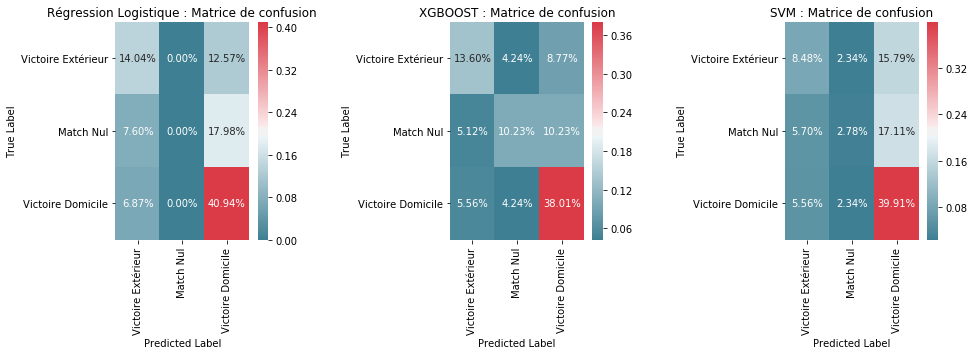

In [148]:
plt.figure(figsize=(15,4))
plt.subplot(131)
matrix = confusion_matrix(y_test, clfs[0].predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Régression Logistique : Matrice de confusion')
plt.subplot(132)
matrix = confusion_matrix(y_test, clfs[5].predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('XGBOOST : Matrice de confusion')
plt.subplot(133)
matrix = confusion_matrix(y_test, svclassifier.predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.subplots_adjust(wspace=1)
plt.title('SVM : Matrice de confusion')

## Optimisation du modèle réduit

In [151]:
grid =[
    {'penalty':['elasticnet'],'C':[i for i in range(1,55,5)],'solver':['saga']},
    {'penalty':['l2'],'C':[i for i in range(1,55,5)],'solver':['newton-cg','sag','lbfgs','liblinear']},
    {'penalty':['l1'],'C':[i for i in range(1,55,5)],'solver':['saga','liblinear']}
]
GCV=GridSearchCV(LogisticRegression(random_state=42,l1_ratio=1), param_grid = grid, cv = 5, verbose=True, n_jobs=-1)
GCV.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",GCV.best_params_)
print("accuracy :",GCV.best_score_)
print('DeFinetti:',deFinetti(GCV,X_test,y_test))
print('LogLoss : ',log_loss(y_test,GCV.predict_proba(X_test)))

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:  1.3min finished
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


tuned hpyerparameters :(best parameters)  {'C': 26, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.5482456140350878
DeFinetti: 0.5317617767511521
LogLoss :  0.8983505190327147


In [157]:
grid2 =[
    {'kernel':['rbf','sigmoid'],'C':[i for i in range(1,11)],'gamma':['scale'],'decision_function_shape':['ovr']},
    {'kernel':['poly'],'C':[i for i in range(1,11)],'degree':[i for i in range(1,7)],'gamma':['scale'],'decision_function_shape':['ovr']}
]
GCV2=GridSearchCV(SVC(random_state=42,probability=True), param_grid = grid2, cv = 5, verbose=True, n_jobs=-1)
GCV2.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",GCV2.best_params_)
print("accuracy :",GCV2.best_score_)
print('DeFinetti:',deFinetti(GCV2,X_test,y_test))
print('LogLoss : ',log_loss(y_test,GCV2.predict_proba(X_test)))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 15.5min finished


tuned hpyerparameters :(best parameters)  {'C': 4, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf'}
accuracy : 0.5343567251461988
DeFinetti: 0.5837396087040126
LogLoss :  0.9821498373849435


In [160]:
grid3 ={'n_estimator':[i for i in range(0,550,50)],
    'eta':[i for i in np.arange(0.01,0.21,0.02)],
            'max_depth':[i for i in range(11)],
            'colsample_bytree':[i for i in np.arange(0.5,1.0,0.1)]}
estimator = XGBClassifier(objective='multi:softmax',eval_metric='logloss',seed=42)
GCV3=GridSearchCV(estimator = estimator, param_grid = grid3, cv = 5, verbose=True, n_jobs=3)
GCV3.fit(X_train,y_train)

Fitting 5 folds for each of 6050 candidates, totalling 30250 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    3.9s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   33.5s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  4.9min
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:  7.5min
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:  9.8min
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed: 12.5min
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed: 15.3min
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed: 18.7min
[Parallel(n_jobs=3)]: Done 4994 tasks      | elapsed: 22.7min
[Parallel(n_jobs=3)]: Done 6044 tasks      | elapsed: 27.7min
[Parallel(n_jobs=3)]: Done 7194 tasks      | elapsed: 32.4min
[Parallel(n_jobs=3)]: Done 8444 tasks      | elapsed: 38.0min
[Parallel(n_jobs=3)]: Done 9794 tasks      | elapsed: 43.7min
[Parallel(n_jobs=3)]: Done 11244 tasks      | elapsed: 49.6mi

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='logloss',
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='multi:softmax', random_state...
                                              0.8999999999999999],
                         'eta': [0.01, 0.03, 0.049999999999999996,
                                 0.06999999999999999, 0.08999999999999998,
                                 0.10999999999999997, 0.12999999999999998, 0.15,
                                 0.16999999999999998, 0.1899999999

In [161]:
print("tuned hpyerparameters :(best parameters) ",GCV3.best_params_)
print("accuracy :",GCV3.best_score_)
print('DeFinetti:',deFinetti(GCV3,X_test,y_test))
print('LogLoss : ',log_loss(y_test,GCV3.predict_proba(X_test)))

tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.8999999999999999, 'eta': 0.01, 'max_depth': 2, 'n_estimator': 0}
accuracy : 0.5752923976608187
DeFinetti: 0.5196334071751665
LogLoss :  0.8783876160432024


Text(0.5, 1, 'SVM : Matrice de confusion')

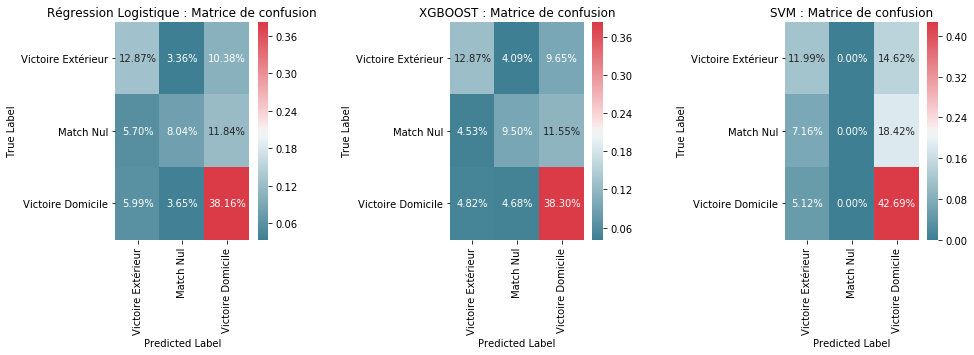

In [158]:
plt.figure(figsize=(15,4))
plt.subplot(131)
matrix = confusion_matrix(y_test, GCV.predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Régression Logistique : Matrice de confusion')
plt.subplot(132)
matrix = confusion_matrix(y_test, GCV3.predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('XGBOOST : Matrice de confusion')
plt.subplot(133)
matrix = confusion_matrix(y_test, GCV2.predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.subplots_adjust(wspace=1)
plt.title('SVM : Matrice de confusion')

In [169]:
grid4 ={'n_estimators':[100,250,500,750,1000],
       'criterion':['gini','entropy'],
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf' :[1, 2, 4],
       'bootstrap':[True,False]}
estimator = RandomForestClassifier(random_state=42)
GCV4=GridSearchCV(estimator = estimator, param_grid = grid4, cv = 5, verbose=True, n_jobs=3)
GCV4.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  7.4min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 21.9min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 46.2min
[Parallel(n_jobs=3)]: Done 900 out of 900 | elapsed: 99.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'boo

In [170]:
print("tuned hpyerparameters :(best parameters) ",GCV4.best_params_)
print("accuracy :",GCV4.best_score_)
print('DeFinetti:',deFinetti(GCV4,X_test,y_test))
print('LogLoss : ',log_loss(y_test,GCV4.predict_proba(X_test)))

tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1000}
accuracy : 0.5617690058479532
DeFinetti: 0.5284307520860793
LogLoss :  0.8917279845619782


Text(0.5, 1, 'RF : Matrice de confusion')

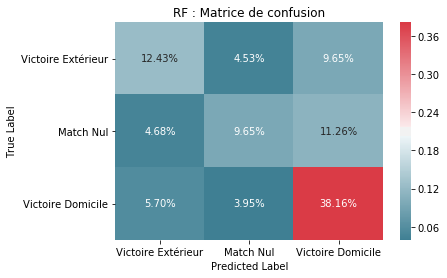

In [171]:
matrix = confusion_matrix(y_test, GCV4.predict(X_test))
sns.heatmap(matrix/np.sum(matrix),annot=True,cbar=True,fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile'],
            yticklabels=['Victoire Extérieur','Match Nul','Victoire Domicile']
           )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.subplots_adjust(wspace=1)
plt.title('RF : Matrice de confusion')